In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
sns.set(style="ticks")

In [2]:
df = pd.read_csv("dataset.csv")

## Visualization selection
There is a [large view](https://iwaponline.com/view-large/figure/2603521/jwc-d-20-00345f02.tif) of the graph named **RCM predicted recharge for (a) Cedar and (b) Rainy Basins for 1968–1998**.

We find the visualization on a [webpage](https://iwaponline.com/jwcc/article/doi/10.2166/wcc.2021.345/83950/Estimation-of-groundwater-recharge-using-multiple#supplementary-data) which is an essay, and the graph is the **Figure 2** of the essay.

We also put the picture into the current directory. (named **figure2.png**) ![figure2.png](./figure2.png)

## Replicate the visualization

In [3]:
def dfdef(ax, Re, Rc, Co, Ma, Eg = None):
    dfdef = df[(df.Region == Re) & (df.RCM == Rc)]
    xxx = dfdef["Measured Recharge"].values.tolist()
    yyy = dfdef["RCM Recharge"].values.tolist()
    ax.scatter(xxx, yyy, color = Co, marker = Ma, edgecolors= Eg)

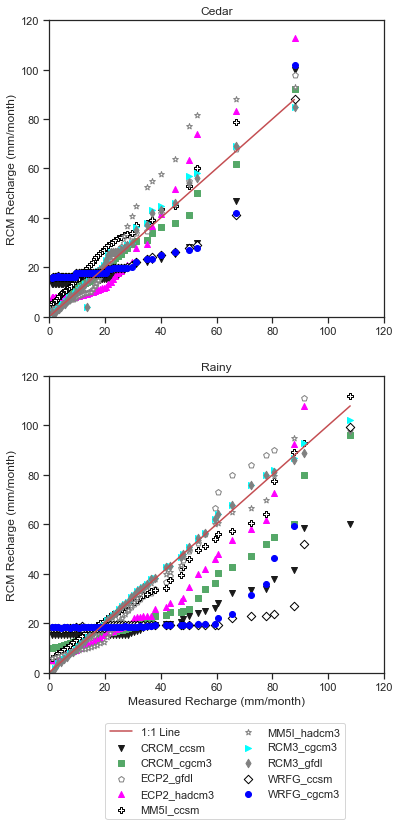

In [5]:
fig, axes = plt.subplots(2,1,figsize=(6,12))

dfdef(axes[0], "Cedar River Basin", "CRCM_ccsm", "k", "v")
dfdef(axes[0], "Cedar River Basin", "CRCM_cgcm3", "g", "s")
dfdef(axes[0], "Cedar River Basin", "ECP2_gfdl", "w", "p", "grey")
dfdef(axes[0], "Cedar River Basin", "ECP2_hadcm3", "magenta", "^")
dfdef(axes[0], "Cedar River Basin", "MM5I_ccsm", "w", "P", "black")
dfdef(axes[0], "Cedar River Basin", "MM5I_hadcm3", "w", "*", "grey")
dfdef(axes[0], "Cedar River Basin", "RCM3_cgcm3", "aqua", ">")
dfdef(axes[0], "Cedar River Basin", "RCM3_gfdl", "grey", "d")
dfdef(axes[0], "Cedar River Basin", "WRFG_ccsm", "w", "D", "black")
dfdef(axes[0], "Cedar River Basin", "WRFG_cgcm3", "blue", "o")
x = np.arange(0, 88, 0.1)
y = x
axes[0].plot(x, y, color = "r")
axes[0].set_xlim((0, 120))
axes[0].set_ylim((0, 120))
axes[0].set_title("Cedar")
axes[0].set_ylabel("RCM Recharge (mm/month)")


dfdef(axes[1], "Rainy River Basin", "CRCM_ccsm", "k", "v")
dfdef(axes[1], "Rainy River Basin", "CRCM_cgcm3", "g", "s")
dfdef(axes[1], "Rainy River Basin", "ECP2_gfdl", "w", "p", "grey")
dfdef(axes[1], "Rainy River Basin", "ECP2_hadcm3", "magenta", "^")
dfdef(axes[1], "Rainy River Basin", "MM5I_ccsm", "w", "P", "black")
dfdef(axes[1], "Rainy River Basin", "MM5I_hadcm3", "w", "*", "grey")
dfdef(axes[1], "Rainy River Basin", "RCM3_cgcm3", "aqua", ">")
dfdef(axes[1], "Rainy River Basin", "RCM3_gfdl", "grey", "d")
dfdef(axes[1], "Rainy River Basin", "WRFG_ccsm", "w", "D", "black")
dfdef(axes[1], "Rainy River Basin", "WRFG_cgcm3", "blue", "o")
x = np.arange(0, 108, 0.1)
y = x
axes[1].plot(x, y, color = "r")
axes[1].set_xlim((0, 120))
axes[1].set_ylim((0, 120))
axes[1].set_title("Rainy")
axes[1].set_xlabel("Measured Recharge (mm/month)")
axes[1].set_ylabel("RCM Recharge (mm/month)")

leg = ["1:1 Line",
       "CRCM_ccsm",
       "CRCM_cgcm3",
       "ECP2_gfdl",
       "ECP2_hadcm3",
       "MM5I_ccsm",
       "MM5I_hadcm3",
       "RCM3_cgcm3",
       "RCM3_gfdl",
       "WRFG_ccsm",
       "WRFG_cgcm3"]
plt.legend(leg, ncol=2, bbox_to_anchor=(0.9,-0.15))

## Improve the visualization
We use small multiples to improve it.

In [6]:
GCM = []
for m in df['RCM'].values:
    GCM.append(m[m.find('_')+1:])
df['GCM'] = GCM
df

,Region,RCM,Measured Recharge,RCM Recharge,GCM
0,Cedar River Basin,CRCM_ccsm,1.0,13.2,ccsm
1,Cedar River Basin,CRCM_ccsm,1.5,13.3,ccsm
2,Cedar River Basin,CRCM_ccsm,2.0,13.3,ccsm
3,Cedar River Basin,CRCM_ccsm,2.6,13.3,ccsm
4,Cedar River Basin,CRCM_ccsm,3.1,13.3,ccsm
...,...,...,...,...,...
987,Rainy River Basin,WRFG_cgcm3,65.4,23.8,cgcm3
988,Rainy River Basin,WRFG_cgcm3,72.2,31.2,cgcm3
989,Rainy River Basin,WRFG_cgcm3,77.8,35.7,cgcm3
990,Rainy River Basin,WRFG_cgcm3,80.5,46.2,cgcm3


Text(0.5, -0.05, 'RCM predicted recharge for Cedar and Rainy Basins for 1968–1998')

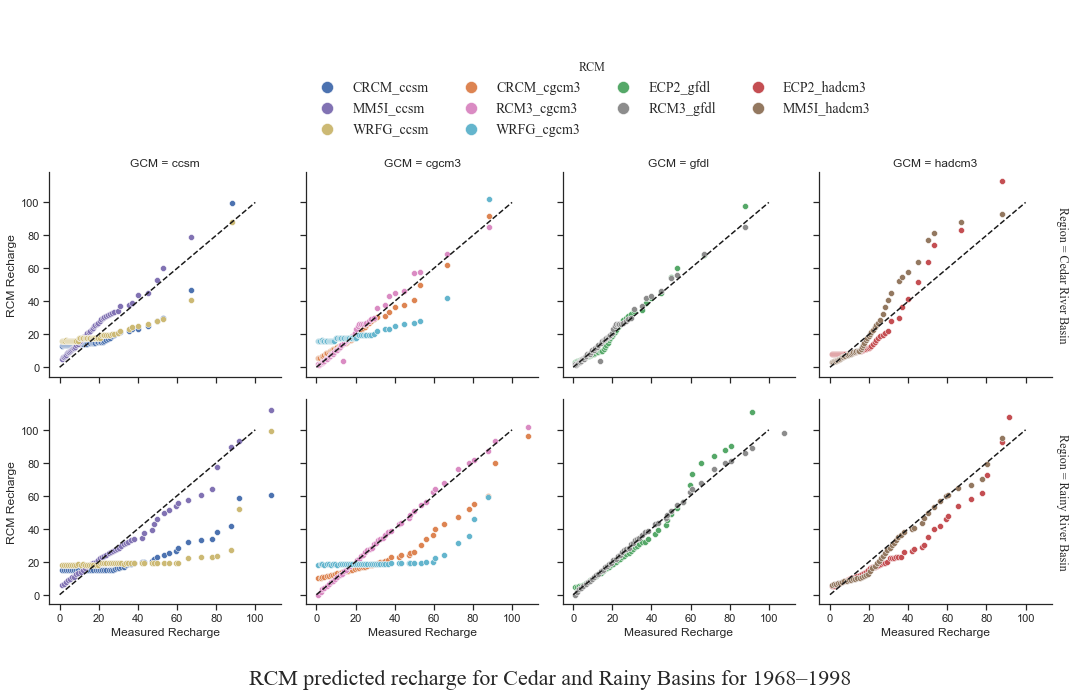

In [10]:
sns.set_theme(font='Times New Roman')
with sns.axes_style("ticks"):
    g = sns.FacetGrid(df, row="Region", col="GCM", margin_titles=True, height=3, hue='RCM')
g.map(plt.scatter, "Measured Recharge", "RCM Recharge", edgecolor="white", lw=.5)
lgd_order = ["CRCM_ccsm",
             "MM5I_ccsm",
             "WRFG_ccsm",
             "CRCM_cgcm3",
             "RCM3_cgcm3",
             "WRFG_cgcm3",
             "ECP2_gfdl",
             "RCM3_gfdl",
             "ECP2_hadcm3",
             "MM5I_hadcm3"]
for ax in g.axes.flat:
    ax.plot((0, 100), (0, 100), c=".1", ls="--")
g.add_legend(label_order=lgd_order, ncol=4, fontsize=14, markerscale=2)
g._legend.set_bbox_to_anchor([0.21,1.5])
g._legend._loc=2
plt.subplots_adjust(bottom=0.1, top=1.1, left=0.15, right=0.85)
g.fig.suptitle("RCM predicted recharge for Cedar and Rainy Basins for 1968–1998",y=-0.05,fontsize=22)

In [11]:
sns.FacetGrid?